In [ ]:
!nvidia-smi

Mon Dec 26 04:52:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading deep learning algorithm
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50  import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import keras
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMAGE_SIZE = [224,224]
CLASS=2
inception = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = VGG16(weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
x = Flatten()(inception.output)
prediction = Dense(CLASS, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer = adam,
  metrics=['accuracy']
)
print("\n\n")
model.summary()

94765736/94765736 [==============================] - 3s 0us/step



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block3_2_relu[0][0]']    
          

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /test',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')
print("\n\n")
model.optimizer.get_config()

Found 516 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 75 images belonging to 2 classes.





{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [ ]:
filepath = "/content/drive/MyDrive/Dataset Taka/resnet50/highest_val2.h5"
filepath2 = "/content/drive/MyDrive/Dataset Taka/resnet50/highest_train2.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint1,checkpoint2]
r = model.fit_generator(
    training_set,
    epochs=1,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)
model.save_weights("/content/drive/MyDrive/Dataset Taka/resnet50/end2.h5")

<ipython-input-5-cda80d82d4bf>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


17/17 [==============================] - ETA: 0s - loss: 2.5103 - accuracy: 0.7733
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to /content/drive/MyDrive/Dataset Taka/resnet50/highest_val2.h5

Epoch 1: accuracy improved from -inf to 0.77326, saving model to /content/drive/MyDrive/Dataset Taka/resnet50/highest_train2.h5
17/17 [==============================] - 314s 18s/step - loss: 2.5103 - accuracy: 0.7733 - val_loss: 1.6442 - val_accuracy: 0.1429


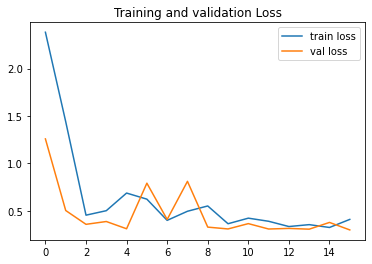

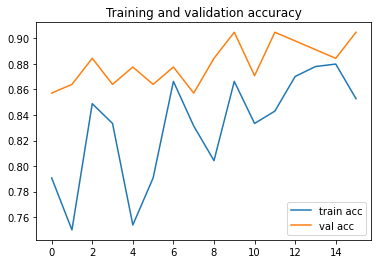

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#evaluating the model (test acc)
#batch size = 32
model.load_weights('/content/drive/MyDrive/Dataset Taka/resnet50/highest_val2.h5')
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Loss = 0.27771657705307007
Test Accuracy = 0.8933333158493042


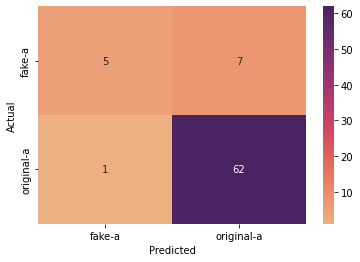

In [ ]:
#confusion matrix

#you have to set test bath size=1 before running the cell
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights('/content/drive/MyDrive/Dataset Taka/resnet50/highest_val2.h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='flare', annot=True, fmt='d')
plt.show()
#plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')

In [ ]:
lst=[r.history['loss'],r.history['val_loss'],r.history['accuracy'],r.history['val_accuracy']]

In [ ]:
print(lst)

[[2.382920742034912, 1.4400615692138672, 0.4540446102619171, 0.5012685656547546, 0.6872076392173767, 0.6228799223899841, 0.39935368299484253, 0.4952242374420166, 0.5511231422424316, 0.3637104332447052, 0.4224889874458313, 0.38967081904411316, 0.3341340124607086, 0.3541657626628876, 0.3243071138858795, 0.4093259871006012], [1.258139967918396, 0.5032281279563904, 0.3574312627315521, 0.38717880845069885, 0.3106265068054199, 0.7911972999572754, 0.40873023867607117, 0.8106410503387451, 0.3280290961265564, 0.3087470531463623, 0.3649207651615143, 0.3080900311470032, 0.3143693506717682, 0.30633705854415894, 0.37752658128738403, 0.29853004217147827], [0.7906976938247681, 0.75, 0.8488371968269348, 0.8333333134651184, 0.7538759708404541, 0.7906976938247681, 0.8662790656089783, 0.8313953280448914, 0.8042635917663574, 0.8662790656089783, 0.8333333134651184, 0.8430232405662537, 0.8701550364494324, 0.8779069781303406, 0.8798449635505676, 0.8527131676673889], [0.8571428656578064, 0.8639456033706665, 0